# Regresión Logística

#### Autor: Emilio Martínez Miranda

Sirve para predecir los valores de una variable categórica en función de una (o más) variables independientes (features). 
Es un método de clasificación.

Regresión Logística Binomial: cuando la salida (target, variable dependiente) es Verdadero-Falso, 0-1, Si-No

Regresión lineal con una transformación para que solo regrese dos valores. A esa transformación se le llama función de activación (utilizada en redes neuronales artificiales). Hay varias funciones con el comportamiento deseado pero la más usada es la función sigmoide.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore')

In [2]:
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


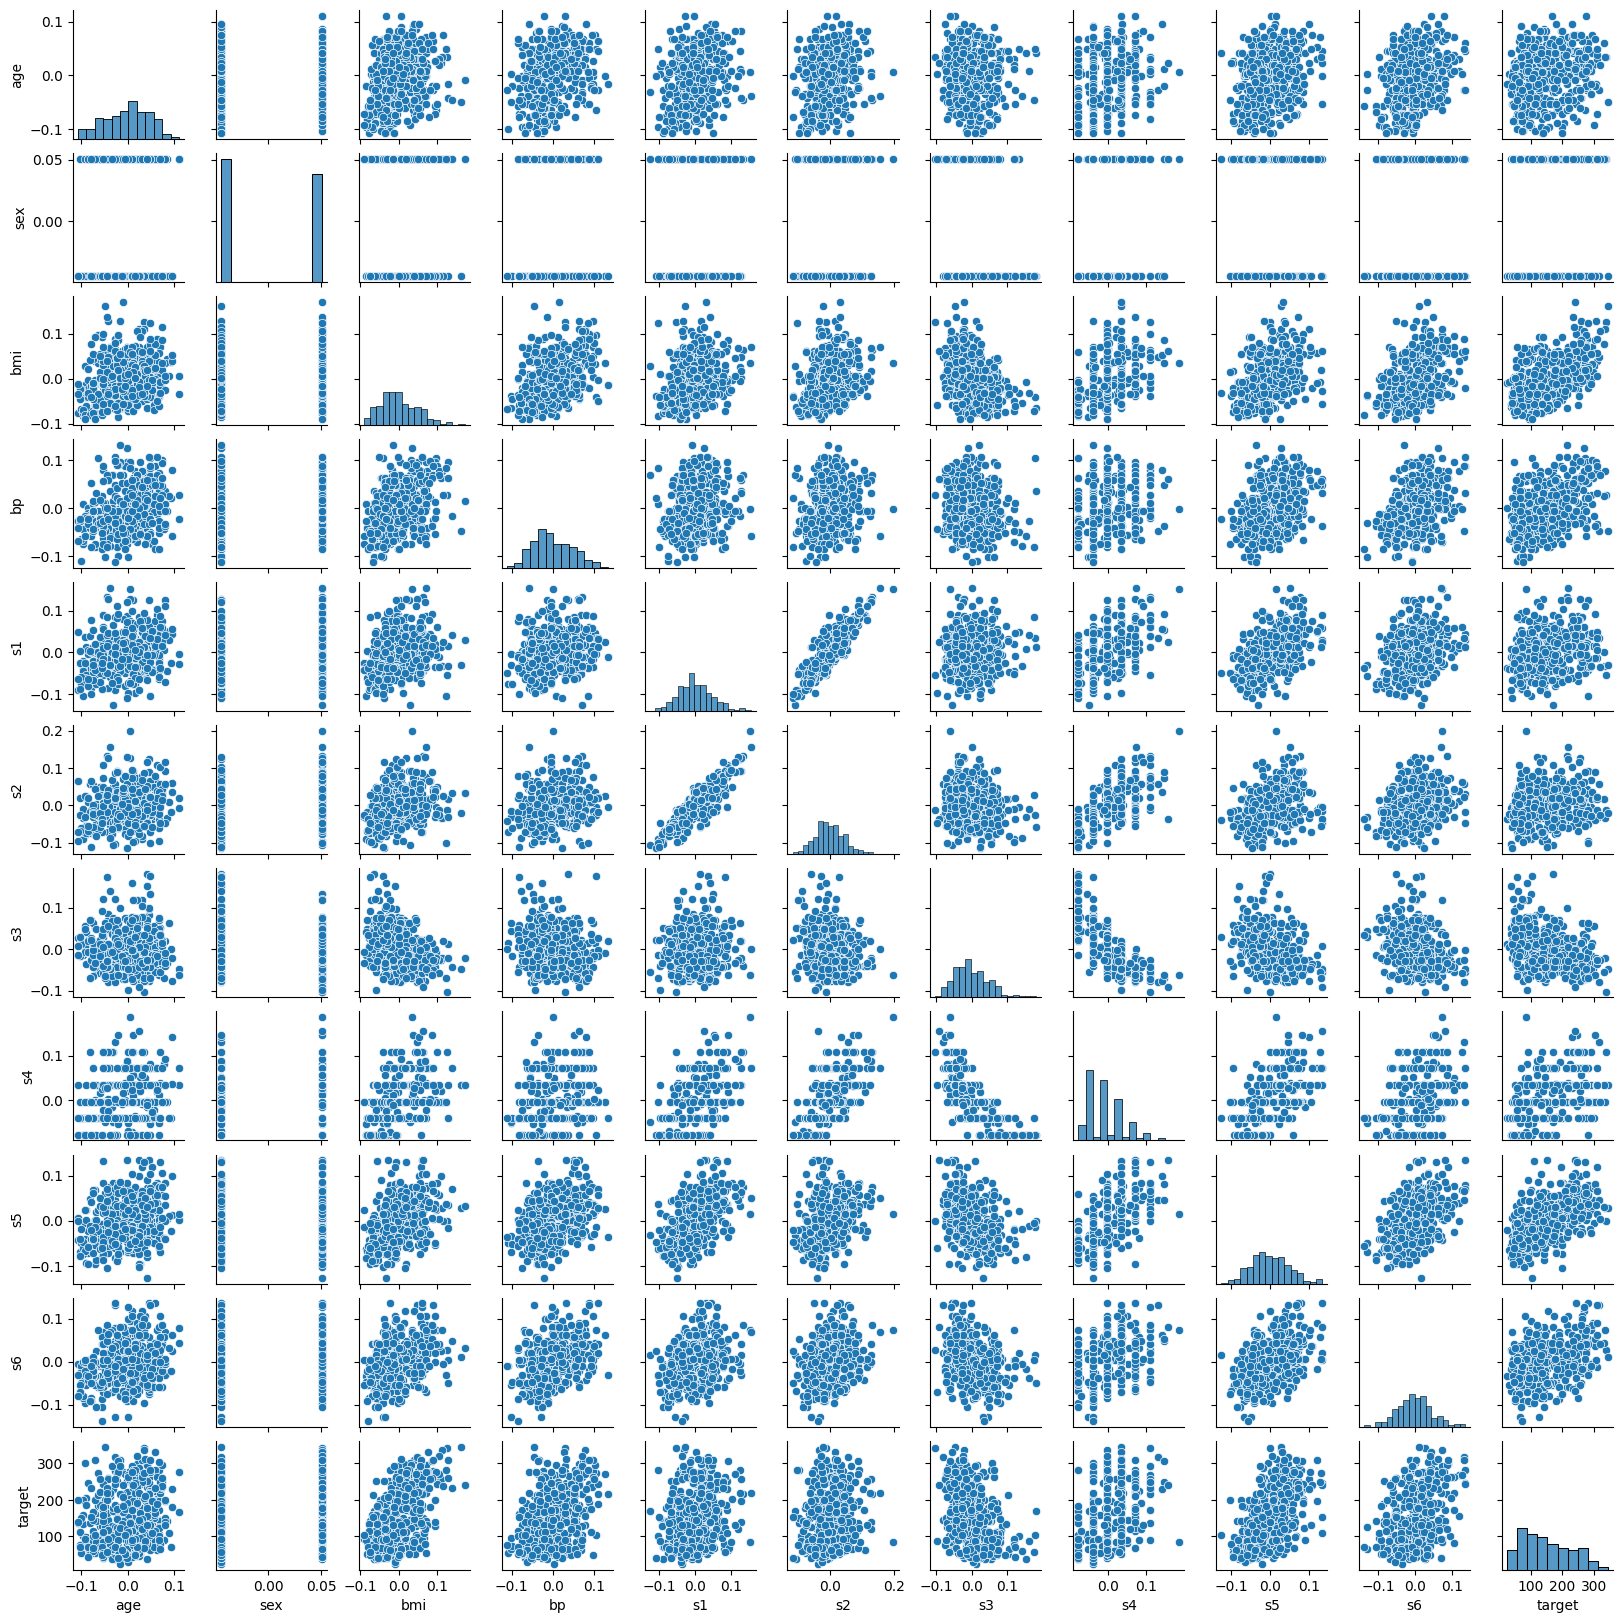

In [3]:
sns.pairplot(df, height=1.5)
plt.show()

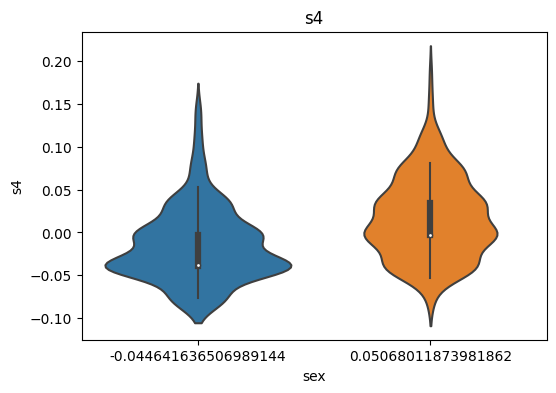

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x = 'sex', y = 's4', data = df, ax = ax)
ax.set_title('s4')
plt.show()

In [5]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s4']] #df.drop(columns=['sex'])
y = df[['sex']]

In [6]:
#from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [7]:
y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [9]:
#reg_log.predict_proba(X_test)

In [8]:
print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[2.02087096]]
intercept:  [-0.08494578]
score:  0.6018099547511312


In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1], dtype=int64)

In [13]:
#import statsmodels.api as sm

X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.639216
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                 0.07663
Time:                        14:19:24   Log-Likelihood:                -197.52
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                 1.031e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0797      0.120     -0.663      0.508      -0.315       0.156
s4            14.5236      2.

In [14]:
intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf

,0,1
const,-0.315284,0.155978
s4,9.129839,19.917434


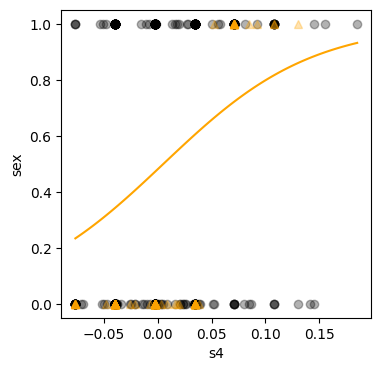

In [15]:
# Gris = valores originales, naranja = predicciones

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s4')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()

### Evaluación del desempeño del modelo

In [16]:
accuracy_score(y_test, y_pred)

0.6165413533834586

In [17]:
def accuracy(TP, TN, FP, FN):
    a = (TP + TN) / (TP + TN + FP + FN)
    return a * 100

def sensibilidad(TP, TN, FP, FN):
    s = TP / (TP + FN)
    return s * 100

def especificidad(TP, TN, FP, FN):
    e = TN / (TN + FP)
    return e * 100

def evaluar_modelo(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = matrix.ravel()

    print(f"Exactitud: {accuracy(TP, TN, FP, FN)}")
    print(f"Sensibilidad: {sensibilidad(TP, TN, FP, FN)}")
    print(f"Especificidad: {especificidad(TP, TN, FP, FN)}")

In [18]:
m = confusion_matrix(y_test, y_pred)
m

array([[69,  5],
       [46, 13]], dtype=int64)

In [19]:
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(69, 5, 46, 13)

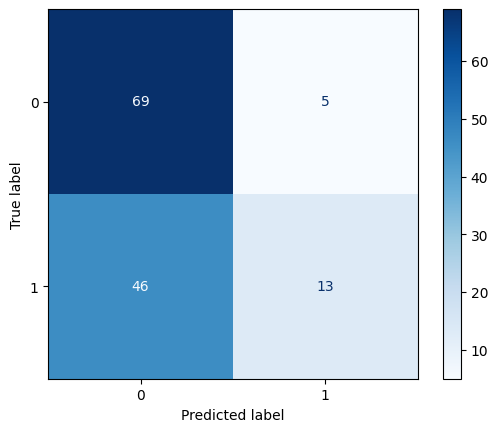

In [20]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
evaluar_modelo(y_test, y_pred)

Exactitud: 61.65413533834586
Sensibilidad: 22.033898305084744
Especificidad: 93.24324324324324


### Ejercicio

Aplicar lo mismo para otra variable

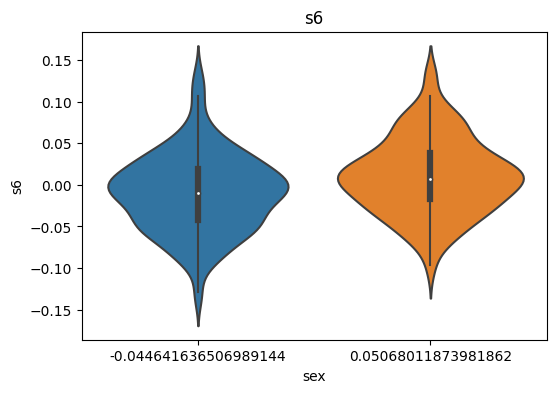

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x = 'sex', y = 's6', data = df, ax = ax)
ax.set_title('s6')
plt.show()

In [23]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['s6']] #df.drop(columns=['sex'])
y = df[['sex']]

In [24]:
#from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [25]:
y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [26]:
print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[1.60240497]]
intercept:  [-0.0830678]
score:  0.5746606334841629


In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [27]:
X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.661579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                 0.04432
Time:                        14:29:21   Log-Likelihood:                -204.43
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                 1.333e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0792      0.117     -0.674      0.500      -0.309       0.151
s6            10.1559      2.

In [29]:
intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf

,0,1
const,-0.309376,0.150994
s6,5.380310,14.931414


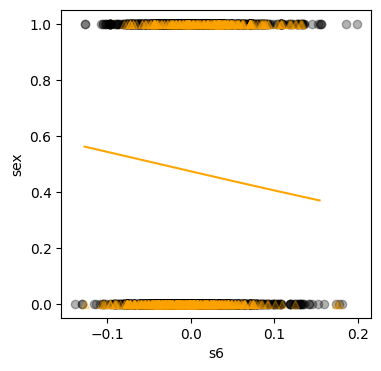

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s6')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()

#### Evaluación del modelo


In [31]:
accuracy_score(y_test, y_pred)

0.5488721804511278

[[69  5]
 [55  4]]


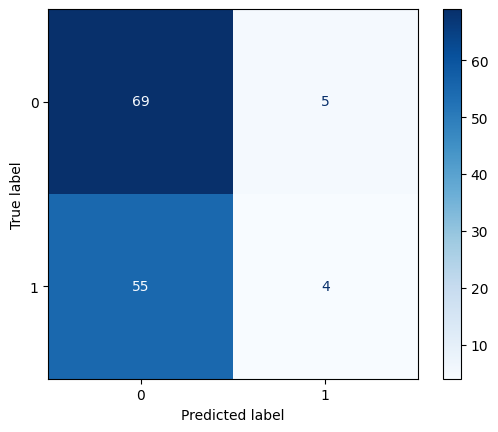

In [32]:
m = confusion_matrix(y_test, y_pred)
print(m)

ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues)
plt.show()

### Ejemplo

con todas las variables

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x = 'sex', y = 's6', data = df, ax = ax)
ax.set_title('s6')
plt.show()

In [55]:
# Definir nuestras variables dependiente e independiente(s)
X = df.drop(columns=['sex', 'target'])
y = df[['sex']]
X.head(3)

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [56]:
le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[ 0.7189599   0.14554819  1.22455538 -0.10724006  0.54784786 -1.92489653
   1.54059731  0.3719906   1.22268776]]
intercept:  [-0.08268832]
score:  0.6561085972850679


In [57]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1], dtype=int64)

In [58]:
X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.582459
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.1586
Time:                        14:49:13   Log-Likelihood:                -179.98
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                 3.998e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1081      0.129     -0.841      0.401      -0.360       0.144
age            2.3874      2.

In [59]:
intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf

,0,1
const,-0.360284,0.143999
age,-3.386753,8.161620
bmi,-13.940898,-0.979172
bp,3.619788,16.850185
s1,-52.997641,26.351834
s2,-20.719314,41.593177
s3,-32.408799,12.458828
s4,-10.464793,24.671677
s5,-19.059328,12.799291
s6,0.053669,12.702929


In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()

#### Evaluación del modelo

In [46]:
accuracy_score(y_test, y_pred)

0.6240601503759399

[[55 19]
 [31 28]]


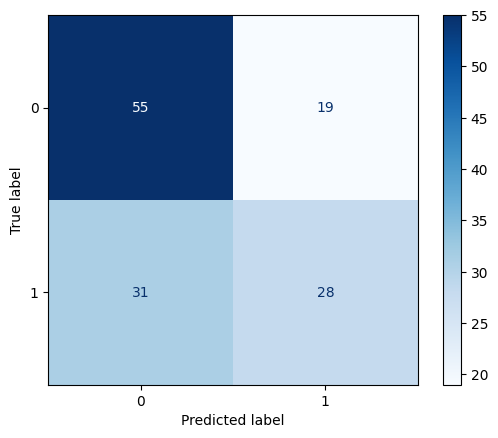

In [47]:
m = confusion_matrix(y_test, y_pred)
print(m)

ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues)
plt.show()

### Regresión Logística Múltiple

In [54]:
# Definir nuestras variables dependiente e independiente(s)
X = df.drop(columns=['sex'])
y = df[['sex']]

le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['sex']])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[ 7.32537147e-01  2.21683888e-01  1.26074692e+00 -9.41372886e-02
   5.49314544e-01 -1.96919554e+00  1.58139518e+00  4.42835384e-01
   1.26045523e+00 -5.57831537e-04]]
intercept:  [0.00250488]
score:  0.6742081447963801


In [60]:
accuracy_score(y_test, y_pred)

0.6917293233082706

[[55 19]
 [22 37]]


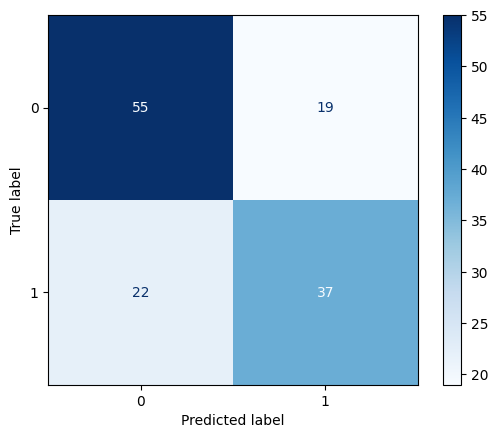

In [61]:
m = confusion_matrix(y_test, y_pred)
print(m)

ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues)
plt.show()